<a href="https://colab.research.google.com/github/keduog/LLM/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Language_Model_Training_Overview.xlsx to Language_Model_Training_Overview (8).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

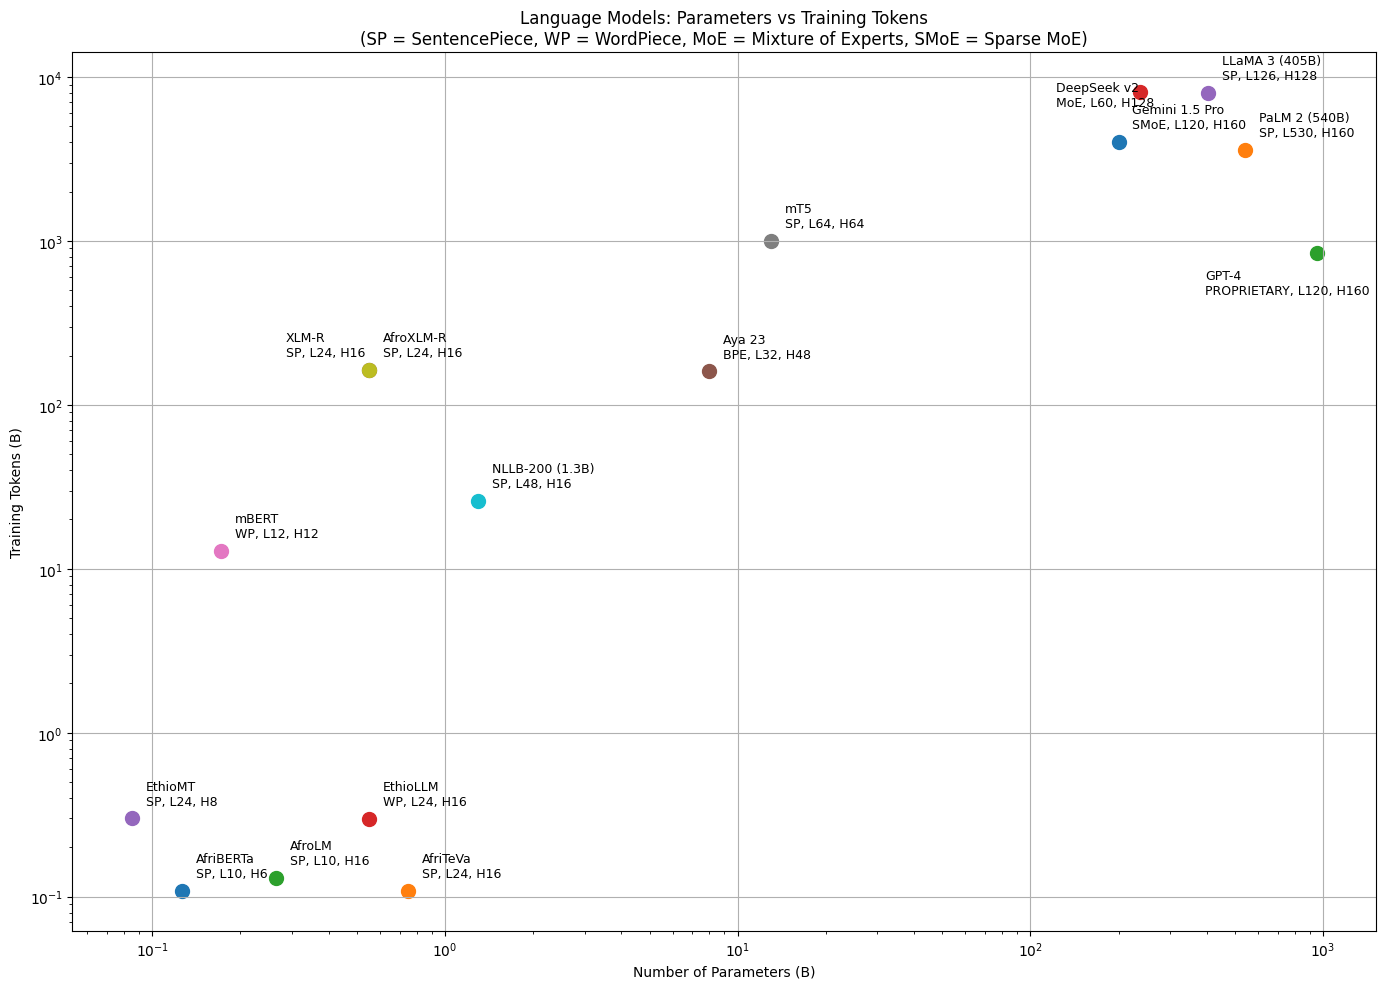

In [10]:
# Step 1: Install required libraries
!pip install matplotlib pandas openpyxl

# Step 2: Imports
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Upload your Excel file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 4: Load Excel data
df = pd.read_excel(filename)

# Step 5: Parse sizes (M, B, T support)
def parse_size(value):
    if isinstance(value, str):
        value = value.strip().upper().replace(",", "")
        if value.endswith('T'):
            return float(value[:-1]) * 1000
        elif value.endswith('B'):
            return float(value[:-1])
        elif value.endswith('M'):
            return float(value[:-1]) / 1000
    try:
        return float(value)
    except:
        return None

df['Parameters_B'] = df['Parameters'].apply(parse_size)
df['Training_Tokens_B'] = df['Training Tokens'].apply(parse_size)

# Step 6: Abbreviate tokenization or architecture
def abbreviate_method(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    if "sentencepiece" in text:
        return "SP"
    elif "wordpiece" in text:
        return "WP"
    elif "sparse mixture" in text or "sparse moe" in text:
        return "SMoE"
    elif "mixture of experts" in text or "moe" in text:
        return "MoE"
    return text.upper()

df['Tok_Abbrev'] = df['Tokenization Used'].apply(abbreviate_method)

# Step 7: Create labels
df['Label'] = df.apply(
    lambda row: f"{row['Name of the Model']}\n{row['Tok_Abbrev']}, L{row['Layers']}, H{row['Heads']}",
    axis=1
)

# Step 8: Adjust label offsets
offsets = {
    "XLM-R": (-60, 10),
    "DeepSeek v2": (-60, -10),
    "LLaMA 3": (10, 10),
    "PaLM 2": (50, 10),
    "GPT-4": (-80, -30)  # shift left and down to fit inside box
}

# Step 9: Adjust GPT-4 coordinates slightly
filtered_df = df.dropna(subset=['Parameters_B', 'Training_Tokens_B'])
adjusted_df = filtered_df.copy()
adjusted_df.loc[adjusted_df['Name of the Model'] == 'GPT-4', 'Training_Tokens_B'] *= 0.85
adjusted_df.loc[adjusted_df['Name of the Model'] == 'GPT-4', 'Parameters_B'] *= 0.95

# Step 10: Plot
plt.figure(figsize=(14, 10))
for _, row in adjusted_df.iterrows():
    name = row['Name of the Model']
    x, y = row['Parameters_B'], row['Training_Tokens_B']
    label = row['Label']

    dx, dy = offsets.get(name, (10, 10))

    plt.scatter(x, y, s=100)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(dx, dy),
                 ha='left', fontsize=9)

plt.xlabel("Number of Parameters (B)")
plt.ylabel("Training Tokens (B)")
plt.title("Language Models: Parameters vs Training Tokens\n(SP = SentencePiece, WP = WordPiece, MoE = Mixture of Experts, SMoE = Sparse MoE)")
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()

# Step 11: Save to PDF and download
plt.savefig("model_plot_adjusted.pdf", format="pdf")
files.download("model_plot_adjusted.pdf")

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

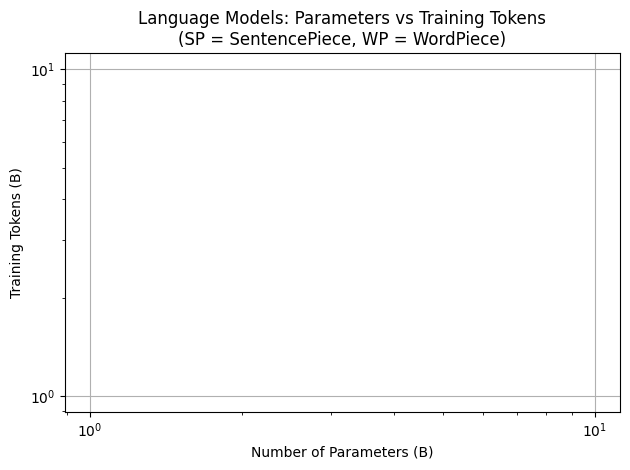

In [3]:
plt.xlabel("Number of Parameters (B)")
plt.ylabel("Training Tokens (B)")
plt.title("Language Models: Parameters vs Training Tokens\n(SP = SentencePiece, WP = WordPiece)")
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()

# ✅ Save as SVG and download
plt.savefig("model_plot.svg", format="svg")
files.download("model_plot.svg")

plt.show()
